# Example 11.2: Actual Refrigeration

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
R-134a flows through a vapor-compression refrigeration cycle.  Heat is removed at a rate of 18 kW from a freezer at $-8^\circ\mathrm{C}$.  Heat is rejected to a room at $22^\circ\mathrm{C}$.  The evaporator and the condenser are $10^\circ\mathrm{C}$ colder or hotter than the thermal reservoirs. The compressor has an isentropic efficiency of 80%. Find:
* (a) $p_\mathrm{evap}$ and $p_\mathrm{cond}$ (kPa)
* (b) $COP_R$
* (c) Net Work
* (d) Volumetric flow rate entering the compressor

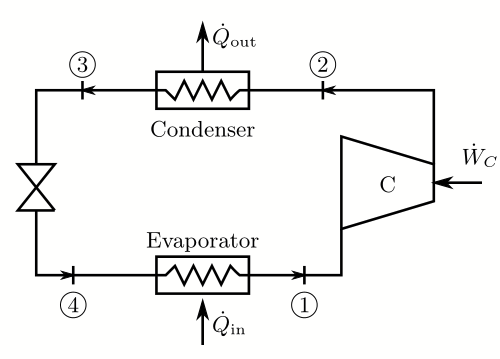

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=2005370&node=7667527&a=2045644701&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from kilojoule.templates.kSI_C import *
r134a = realfluid.Properties('R134a')

### Given Parameters
We now define variables to hold our known values.

In [2]:
Qdot_in = Quantity(18,'kW')   # Rate of heat input
T_L = Quantity(-10,'degC')     # Temperature of refrigerated space
T_H = Quantity(20,'degC')     # Temperature of surroundings
Delta_T = Quantity(10,'delta_degC') # Temperature difference in evaporator and condenser
eta_c = Quantity(0.8,'')      # Compressor isentropic efficiency

Summary();

<IPython.core.display.Latex object>

### Assumptions
- Non-ideal work devices
- Saturated vapor at evaporator exit
- Saturated liquid at condenser exit
- Isobaric heat exchangers
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [3]:
x[1] = 1      # Saturated vapor at evaporator exit
x[3] = 0      # Saturated liquid at condenser exit

Summary();

<IPython.core.display.Latex object>

,x
unit,
1,1
3,0


### (a) Pressures in condenser and evaporator

In [4]:
%%showcalc
#### Evaporator pressure
# The working fluid temperature must be lower than the refrigerated space
T[1] = T_L - Delta_T
# The fluid is saturated, so the saturation pressure must be consistent with the saturation temperature
p[1] = r134a.p(T[1],x[1])

#### Condenser pressure
# The working fluid temperature must be hotter than the surroundings
T[3] = T_H + Delta_T
# The fluid is saturated, so the saturation pressure must be consistent with the saturation temperature
p[3] = r134a.p(T[3],x[3])

### Evaporator pressure

 The working fluid temperature must be lower than the refrigerated space

<IPython.core.display.Latex object>

 The fluid is saturated, so the saturation pressure must be consistent with the saturation temperature

<IPython.core.display.Latex object>

### Condenser pressure

 The working fluid temperature must be hotter than the surroundings

<IPython.core.display.Latex object>

 The fluid is saturated, so the saturation pressure must be consistent with the saturation temperature

<IPython.core.display.Latex object>

### (b) $COP_R$

In [5]:
%%showcalc
#### 1st Law Analysis
##### State 1
h[1] = r134a.h(T[1],x[1])
s[1] = r134a.s(T[1],x[1])

##### 1-2) Ideal compression
p[2] = p['2s'] = p[3]
s['2s'] = s[1]
h['2s'] = r134a.h(p['2s'],s['2s'])
T['2s'] = r134a.T(p['2s'],s['2s'])
h[2] = h[1] + (h['2s']-h[1])/eta_c

##### State 2
T[2] = r134a.T(p[2],h=h[2])
s[2] = r134a.s(p[2],h=h[2])


##### 2-3) Isobaric heat rejection
##### State 3
T[3] = r134a.T(p[3],x[3])
h[3] = r134a.h(p[3],x[3])
s[3] = r134a.s(p[3],x[3])

##### 3-4) Isenthalpic expansion
p[4] = p[1]
h[4] = h[3]

##### State 4
T[4] = r134a.T(p[4],h=h[4])
s[4] = r134a.s(p[4],h=h[4])
x[4] = r134a.x(p[4],h=h[4])

##### COP
# Desired: Heat Input
q_in = h[1]-h[4]
# Cost: Net Work
w_net = h[2]-h[1]
# COP: Desired/Cost
COP_R = q_in/w_net

### 1st Law Analysis

#### State 1

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### 1-2) Ideal compression

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### State 2

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### 2-3) Isobaric heat rejection

#### State 3

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### 3-4) Isenthalpic expansion

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### State 4

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### COP

 Desired: Heat Input

<IPython.core.display.Latex object>

 Cost: Net Work

<IPython.core.display.Latex object>

 COP: Desired/Cost

<IPython.core.display.Latex object>

### (c) Net Work

In [6]:
%%showcalc
##### Mass flow rate
mdot = Qdot_in/q_in

##### Net work
Wdot_net = mdot*w_net

#### Mass flow rate

<IPython.core.display.Latex object>

#### Net work

<IPython.core.display.Latex object>

### (d) Volumetric flow rate entering compressor

In [7]:
%%showcalc
##### Specific volume entering compressor
v[1] = r134a.v(T[1],x[1])

##### Volumetric flow rate
Vdot[1] = mdot*v[1]

#### Specific volume entering compressor

<IPython.core.display.Latex object>

#### Volumetric flow rate

<IPython.core.display.Latex object>

### Diagrams

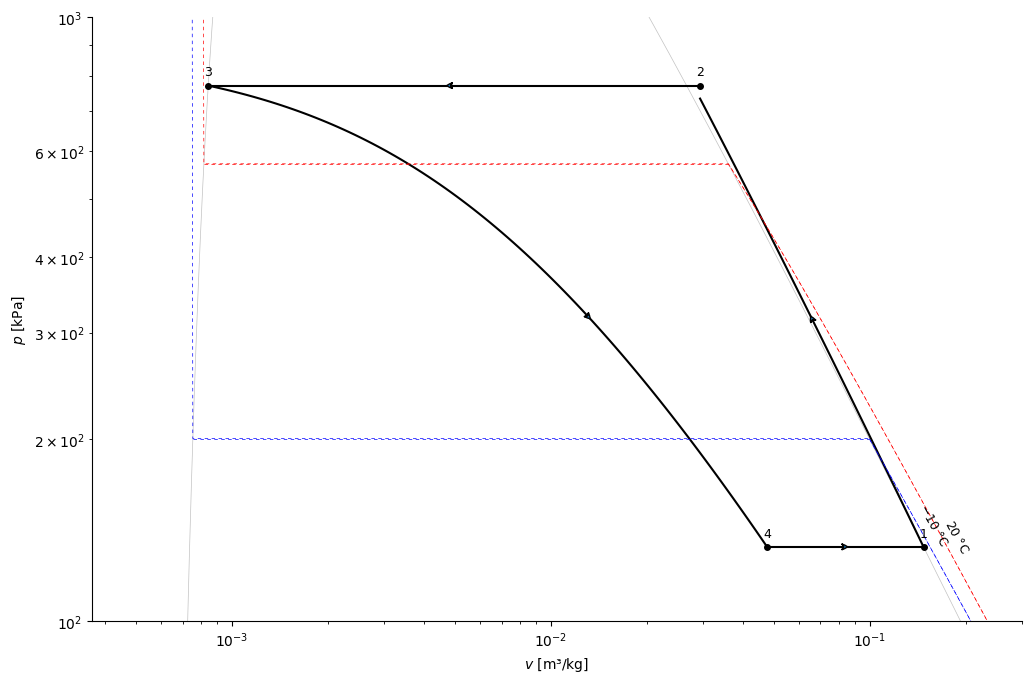

In [8]:
pv = r134a.pv_diagram()
pv.ax.set_ylim(bottom=100,top=1000)
pv.ax.set_xlim(right=.3)

for state in [1,2,3,4]:
    v[state] = r134a.v(p[state],h=h[state])
    pv.plot_state(states[state])
    
pv.plot_process(states[1],states[2],path='isentropic')
pv.plot_process(states[2],states[3],path='isobaric')
pv.plot_process(states[3],states[4],path='isenthalpic')
pv.plot_process(states[4],states[1],path='isobaric');
# Plot Reference Isotherms for refrigerated space and surroundings
# Refrigerated space
pv.plot_isotherm(T_L,color='blue')

# Surrounding temperature
pv.plot_isotherm(T_H,color='red');


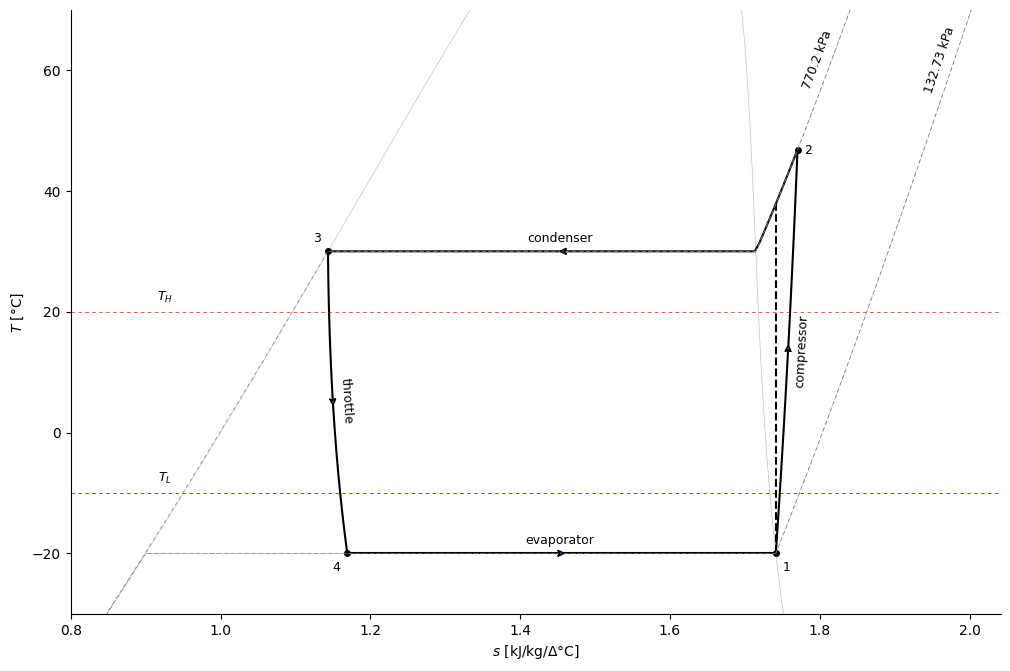

In [9]:
Ts = r134a.Ts_diagram()
Ts.ax.set_ylim(bottom=-30,top=70)
Ts.ax.set_xlim(left=.8)

Ts.plot_state(states[1],label_loc='south east')
Ts.plot_state(states[2],label_loc='east')
Ts.plot_state(states[3],label_loc='north west')
Ts.plot_state(states[4],label_loc='south west')

Ts.plot_process(states[1],states[2],path='nonideal',label='compressor',labelprops=dict(verticalalignment='top'))
Ts.plot_process(states[1],states['2s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states[2],states[3],path='isobaric',label='condenser')
Ts.plot_process(states[3],states[4],path='isenthalpic',label='throttle')
Ts.plot_process(states[4],states[1],path='isobaric',label='evaporator');

# Plot Reference Isotherms for refrigerated space and surroundings
Ts.plot_isotherm(T_L,color='blue',label='$T_L$',pos=0.1)
Ts.plot_isotherm(T_H,color='red',label='$T_H$',pos=0.1)
Ts.plot_isobar(p[2],label=f'{p[2]}')
Ts.plot_isobar(p[1],label=f'{p[1]}');